# Predicting King County Housing Prices

## Final project Submission
* Student names: 
       1. Julius Charles
       2. Brenda Kinoti
       3. cleophas Opati
       4. Winnie Onduru
       5. John Karanja
       6. Joy Wangari
       7. Jonathan Okwaro
* Student pace: part time
* Scheduled project review date/time: 


## Overview

The King County Housing Data Set provides information about houses in King County, including their size, location, condition, and other features. The objective of this project is to create a multiple regression model that can accurately predict the price of a house.

The project is commissioned by a commercial real estate company interested in purchasing homes within a specific area. Their main concerns revolve around obtaining predicted prices for homes in the area, and assessing any notable disparities between the actual prices and our model's predicted prices.



## Business Understanding
The client’s primary objective is to develop a platform that can offer precise house price estimates which are paramount for both buyers and sellers in King County.

In order to achieve this, we are required to come up with a model that is capable of deducing the main factors that influence the house prices. In order to train the model effectively, the client seeks to utilize accurate and representative data pertaining to the real estate market in King County. This data contains historical sales, current listings, size of the property and other pertinent features. 

The model will be able to make precise estimations of a house’s value based on its features upon successful training, the model can be seamlessly integrated into the platform, providing buyers and sellers with reliable estimates of house prices. The information drawn from the model will help both buyers and sellers to make well-informed decisions regarding property transactions.

Harnessing the power of technology by delivering a dependable and accurate platform for house buying and selling in King County, the client can establish themselves as a trusted source in the local real estate market which will then in turn attract a dedicated customer base.

##### Stakeholder: Yunik Realtors

##### Questions to be analyzed:

*Q1: What features have the highest correlation to the home price?*

*Q2: What features have the strongest correlations with other predicting variables?*

*Q3: What combinations of features is the best fit for price predictions?*

## Data Understanding
For this project, we will be using the King County House Sales dataset, which contains information about house sales in a northwestern county. The dataset includes various features such as the number of bedrooms, bathrooms, living area size, condition of the house, presence of additional amenities, and more.

The dataset has 20 columns and over 21500 records, covering house sales between May 2014 and May 2015. The data is suitable for the project because it provide relevant information about the features that affect the house prices in King County. The dataset was obtained from GitHub.

The King County House Sales dataset contains the following columns;
+ Price - Sale price (prediction target),  
+ bedrooms - Number of bedrooms,
+ bathrooms - Number of bathrooms,
+ sqft_living - Square footage of living space in the home, 
+ sqft_lot - Square footage of the lot,
+ floors - Number of floors (levels) in house, 
+ view - Quality of view from house,
+ condition - How good the overall condition of the house is. Related to maintenance of house, 
+ grade - Overall grade of the house. Related to the construction and design of the house, 
+ sqft_above - Square footage of house apart from basement,
+ sqft_basement - Square footage of the basement,
+ yr_built - Year when house was built, 
+ yr_renovated - Year when house was renovated,
+ zipcode - ZIP Code used by the United States Postal Service,
+ sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors, 
+ sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and 
+ sell_yr - Date house was sold.

The features are included based on their properties and relevance for the project. The features that describe the size, quality, location, and age of the house are expected to have an impact on the price of the house. The features that describe the neighborhood characteristics are also included to capture the external factors that may influence the price.

Some limitations of the data that have implications for the project are:

+ The data may not reflect the current market conditions as it was collected from 2014 to 2015.
+ The data may not capture all the factors that affect the house prices such as the interest rates, the economic situation, the demand and supply, etc.
+ The data may have some outliers or errors that need to be handled carefully during the analysis. For example, there is a house with 33 bedrooms which seems unrealistic.

## Data Preparation

In our data preparation process, we imported the necessary libraries, loaded the data, then proceeded to clean the data - dealing with null values and transforming the data as needed. Afterward, we visualized the data to identify correlations between the variables

### Previewing the Data


In [57]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
import folium
import math

In [58]:
#load and preview the data
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [59]:
# check the last 5 rows
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [60]:
#checking datat types and shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset is extensive, comprising over 21,500 entries and consisting of 20 columns. Most of the columns consist of numerical data, making them well-suited for linear regression analysis.

### Data cleaning and preprocessing
In this section, we will prepare the data for the analysis by converting the categorical features into numeric ones. This will allow us to apply mathematical operations and statistical methods on the data. 

We will use label encoding to convert the view and condition feature from text values to numeric values that represent the quality of the view from the house and the condition of the house. 

We will also use pandas functions to convert the date feature from string to datetime format and extract only the year of sale. We will create a new column for sell year and drop the original date column. 

Finally, we will convert the sqft_basement feature from object to int type by handling any errors that may occur during the conversion.

In [61]:
#'View' column transformation
data['view'].replace(to_replace=['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], value=[0, 1, 2, 3, 4], inplace=True)

In [62]:
#'Condition' column transformation
data['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [63]:
#'Grade' column transformation
data['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)


In [64]:
#'Waterfront' column transformation
data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)


In [65]:
# Changing the sqft_basement from object to int
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

In [66]:
# Changing the date to date time
data['date'] = pd.to_datetime(data['date'])
# Extracting only the year from the column Date
data.date = data['date'].dt.year

# Creating a new column for sell year
data['sell_yr'] = pd.to_datetime(data['date'],format='%Y').dt.year
data.drop(columns='date', inplace=True)

In [67]:
#drop unnecessary columns
data.drop(columns=['id', 'lat', 'long'], inplace=True)

#### Handling Missing Values
In this section, we will check the percentage of missing values in each column of the data and handle them accordingly. 

We will fill the missing values in the waterfront column with 0, assuming that the houses without this information do not have a waterfront. We will fill the missing values in the view column with the median value, assuming that the houses without this information have an average view. 

We will drop the remaining missing values in the yr_renovated and sqft_basement columns, as they are not many and may not affect the analysis significantly. We will check the info of the data to confirm the changes and ensure that there are no more missing values in the data.

In [68]:
# Checking for NaN Values as a % of the whole Data Set 
(data.isnull().sum())/len(data)*100

price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.102144
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
sell_yr           0.000000
dtype: float64

In [69]:
#handling missing values in waterfront and view columns
data['waterfront'].fillna(0, inplace=True)
data['view'].fillna(data['view'].median(), inplace=True)

#dropped remaining missing values in the yr_renovated and sqft_basement columns
data.dropna(inplace=True)


#Check the info of the data to check the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17389 non-null  float64
 1   bedrooms       17389 non-null  int64  
 2   bathrooms      17389 non-null  float64
 3   sqft_living    17389 non-null  int64  
 4   sqft_lot       17389 non-null  int64  
 5   floors         17389 non-null  float64
 6   waterfront     17389 non-null  float64
 7   view           17389 non-null  float64
 8   condition      17389 non-null  int64  
 9   grade          17389 non-null  int64  
 10  sqft_above     17389 non-null  int64  
 11  sqft_basement  17389 non-null  float64
 12  yr_built       17389 non-null  int64  
 13  yr_renovated   17389 non-null  float64
 14  zipcode        17389 non-null  int64  
 15  sqft_living15  17389 non-null  int64  
 16  sqft_lot15     17389 non-null  int64  
 17  sell_yr        17389 non-null  int64  
dtypes: flo

+ By using the median to fill missing values, you retain the overall statistical properties of the column. This approach ensures that the imputed values align with the existing data, maintaining the general trends and characteristics of the 'view' column.

+ Water front feature had 11% null values, this was filled with '0' on the assumption that these cells were not filled since they lacked waterfronts

+ Other remaining null values were dropped by row since the overall percentage impact would be minute


In [70]:
#checking the changes have been effected
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sell_yr
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,2014
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,2015
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930,2014


## Exploratory Data Analysis
In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends, or outliers that may exist - using **univariate, bivariate,** and **multivariate analysis.** 

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable. 

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.

### Univariate Analysis

+ Summary statistics of the target variable - price

First, we need to identify the summary statistics of the target variable - price because they can help us understand the distribution and skewness of the house prices in the data and detect any outliers or extreme values that may affect the analysis. They can also help us compare the price variable with other features and evaluate the performance of the predictive models.

count    1.738900e+04
mean     5.409426e+05
std      3.701590e+05
min      8.000000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


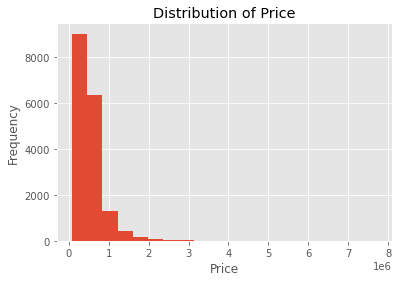

In [71]:
# Extract the "price" column
price = data['price']

# Summary statistics
price_stats = price.describe()
print(price_stats)

# Histogram
plt.style.use('ggplot')
plt.hist(price, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

+ The histogram shows that the distribution of house prices in the dataset is right-skewed. This means that there are more houses with lower prices than there are houses with higher prices.

+ The summary statistics provide more details about the distribution of prices. The mean price is USD 540,942.60, the median price is USD 450,000, and the mode (the most common price) is USD 350000. The standard deviation is USD 370,159.00, which means that about 68% of the houses in the dataset have prices within USD 370,159.00 of the mean price.

Second, we need to create a box plot to investigate the price column because it can show us the median, quartiles, and range of the house prices in the data and highlight any outliers that may be too high or too low. Outliers can distort the analysis and affect the accuracy of the predictive models.

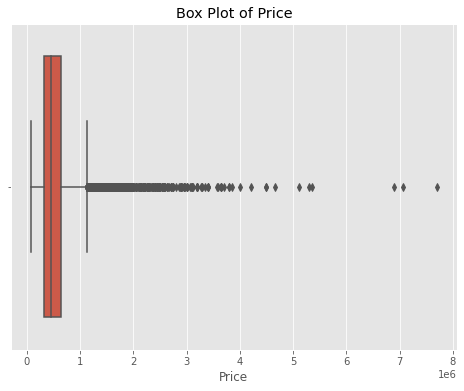

In [72]:
# Box Plot to investigate the price column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()
# From the boxplots below it can be seen that there are a lot of outliers.

+ We decided to use the price column as our target variable.

+ The data is heavily skewed to the left i.e. leptokurtic, as was suspected due to the large number of outliers.We decided not to  remove outliers as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

### Bivariate Analysis
In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

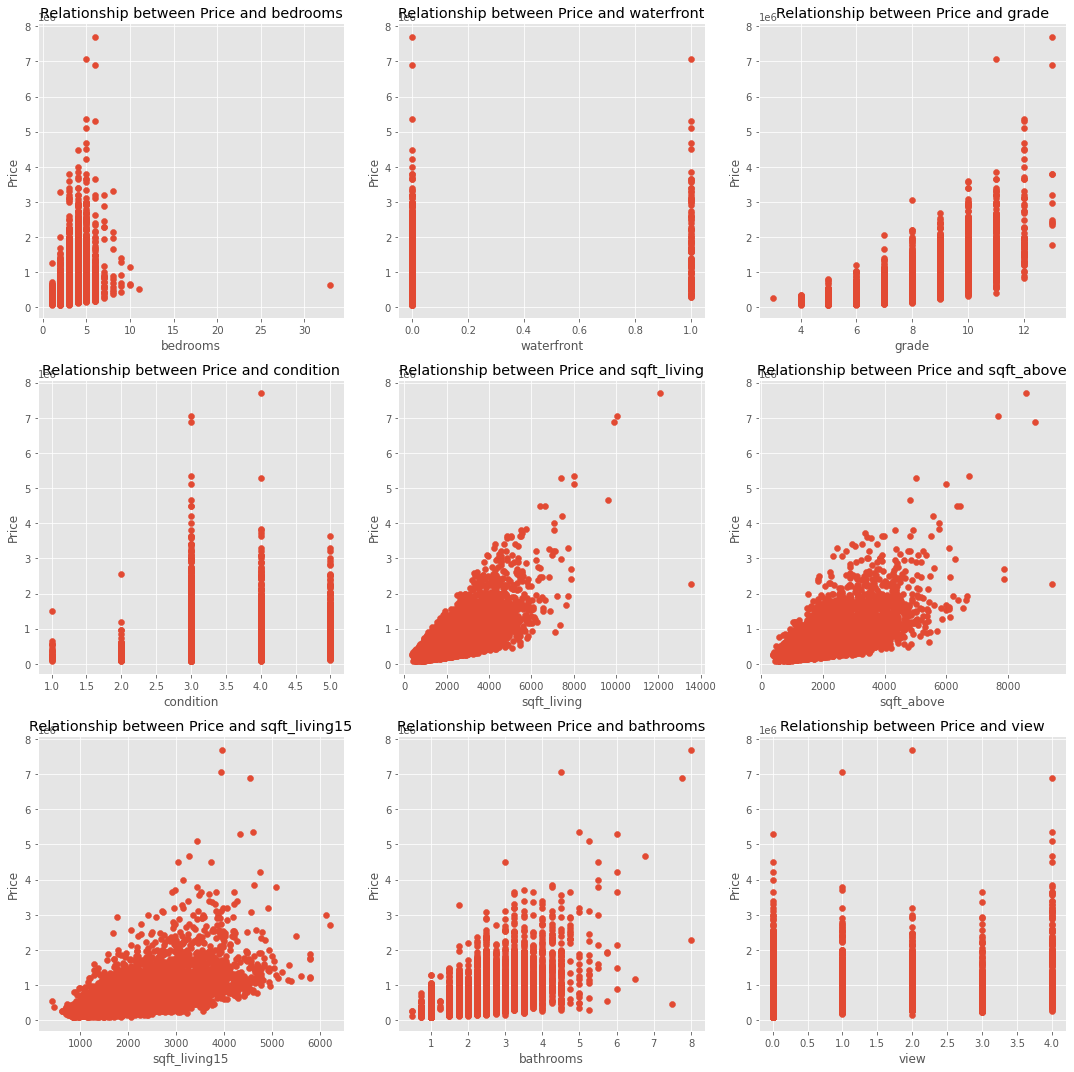

In [73]:
#relationships between our target variable and other independent variables in the dataset
variables = ['bedrooms', 'waterfront', 'grade', 'condition', 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms','view']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(data[var], data['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

+ The output of the scatter plots shows the relationship between the target variable (price) and the independent variables (bedrooms, waterfront, grade, condition, sqft_living, sqft_above, sqft_living15, bathrooms, view) in the dataset.

  + bedrooms: There is a positive relationship between the number of bedrooms and the price of a house. This means that houses with more bedrooms tend to be more expensive.
  + waterfront: There is a positive relationship between waterfront property and the price of a house. This means that houses with waterfront views tend to be more expensive.
  + grade: There is a positive relationship between the grade of a house and the price of a house. This means that houses with higher grades tend to be more expensive.
  + ncondition: There is a positive relationship between the condition of a house and the price of a house. This means that houses in better condition tend to be more expensive.
  + sqft_living: There is a positive relationship between the square footage of a house and the price of a house. This means that houses with more square footage tend to be more expensive.
  + sqft_above: There is a positive relationship between the square footage of the above-ground living space in a house and the price of a house. This means that houses with more square footage in the above-ground living space tend to be more expensive.
  + sqft_living15: There is a positive relationship between the square footage of the living space in a house 15 years ago and the price of a house today. This means that houses that were larger 15 years ago tend to be more expensive today.
  + bathrooms: There is a positive relationship between the number of bathrooms in a house and the price of a house. This means that houses with more bathrooms tend to be more expensive.
  + view: There is a positive relationship between the view from a house and the price of a house. This means that houses with better views tend to be more expensive.
  
+ The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive. The only exception is the variable "view", which has a positive relationship with price, but the relationship is not as strong as the relationships for the other variables.

### Multivariate
In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price. 

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

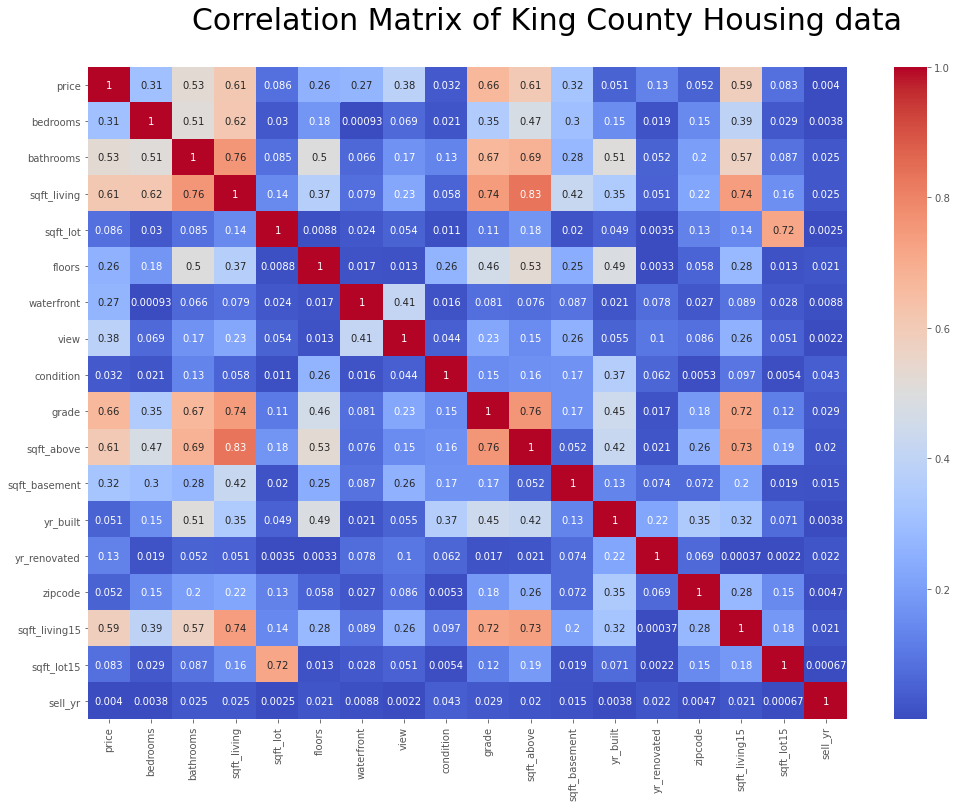

In [106]:
# plot heatmap to show the relationship between various variables
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Correlation Matrix of King County Housing data', fontsize=30, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='coolwarm', annot=True)
heatmap;

#### Question 1: What features have the highest correlation to the home price?

In general, a correlation value above 0.7 is considered high. Although the dataset does not contain any correlations with the price above 0.7, there are several features that exhibit moderately strong correlations. The variables **sqft_living, grade, sqft_living15, sqft_above, and bathrooms** demonstrate the highest correlations with the price.

## Modelling
In this section, we will build and evaluate different statistical models for the house price using the features we have selected and prepared in the previous sections. We will use linear regression to fit the models and compare their performance. We will use metrics such as mean absolute error (MAE), root mean squared error (RMSE), and R-squared (R2) to measure the accuracy and goodness of fit of the models.

### Simple linear regression

First, we start with a simple linear regression, whereby we assume that the house price is a linear function of the square footage of living space. We use the ordinary least squares method to estimate the slope and the intercept of the line that best fits the data. We also calculate the standard error, the t-statistic, and the confidence interval for each parameter. We use the R-squared value to measure how much of the variation in the house price is explained by the model. We use the F-statistic and the p-value to test the overall significance of the model. We use the residual plot to check the assumptions of linearity, homoscedasticity, and normality.

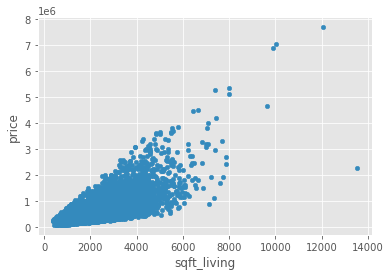

In [75]:
#Relationship between our target variable 'price' and 'sqft_living' which has the highest correlation with our target var.
data.plot.scatter(x="sqft_living", y="price");

+ The scatter plot shows that there is a positive relationship between the two variables, meaning that houses with more square footage tend to be more expensive. The relationship is not perfectly linear, but it is clear that there is a trend. The scatter plot also shows that there is a lot of variation in the price of houses with the same square footage. This is likely due to other factors, such as the location of the house, the condition of the house, and the amenities that are included.

**Baseline model**

For this baseline model, we use linear regression to predict the house price based on one feature: the square footage of living space. 

In [76]:
y = data["price"]
X_baseline = data[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.708e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:56:39   Log-Likelihood:            -2.4168e+05
No. Observations:               17389   AIC:                         4.834e+05
Df Residuals:                   17387   BIC:                         4.834e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.061e+04   4945.383    -10.234      

*Because of the negative const  in our model we decided to do standardization*

Standardization is a technique that transforms the features to have zero mean and unit variance. It helps to reduce the effect of outliers and scale differences among the features. We decided to use standardization because our model had a negative intercept, which means that the predicted house price would be negative when all the features are zero. 

This is unrealistic and indicates that the model is biased by the original scale of the features. By standardizing the features, we hope to improve the accuracy and interpretability of the model.

In [77]:
from sklearn.preprocessing import StandardScaler

y = data["price"]
X_baseline = data[["sqft_living"]]

scaler = StandardScaler()
X_baseline_standardized = scaler.fit_transform(X_baseline.values.reshape(-1, 1))  # Standardizing the independent variable

X_baseline_standardized = sm.add_constant(X_baseline_standardized)
baseline_model = sm.OLS(y, X_baseline_standardized)
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.708e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:56:40   Log-Likelihood:            -2.4168e+05
No. Observations:               17389   AIC:                         4.834e+05
Df Residuals:                   17387   BIC:                         4.834e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.409e+05   1993.627    271.336      0.0

In [78]:
baseline_results.params

const    540942.621830
x1       260584.577375
dtype: float64

+ R-squared and Adj.R-squared value represents the proportion of variance that is explained by the predictor(s). The R-squared value is 0.492 indicating that approximately 49.2% of the variability in the "price" can be explained by the "sqft-living" predictor alone.

+ The coefficient estimates show the relationship between the independent variable (sqft_living) and the dependent variable (price) after standardization. The constant coefficient is 540942.621830, representing the estimated price when the standardized sqft_living is zero. The coefficient for the standardized sqft_living (x1) is  260584.577375, indicating that for every one standard deviation increase in sqft_living, the price is estimated to increase by  260584.577375 units, assuming other variables are held constant

+ The p-values (P>|t|) associated with the coefficients determine their statistical significance. In this case, both the const and sqft_living coefficients have p-values of 0.000, indicating that they are statistically significant

Here, we use linear regression to predict house price from living space. We use statsmodels in Python and plot the results.

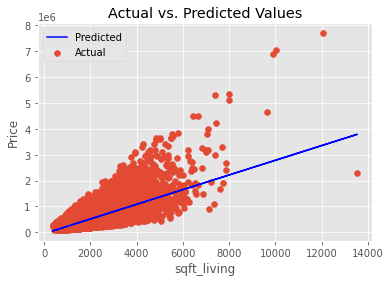

In [79]:
# Fit the simple linear regression model
X = data['sqft_living']  # Independent variable
y = data['price']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X)  # Create the ordinary least squares model
results = model.fit()  # Fit the model to the data

# Visualize the linearity
plt.scatter(X['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(X['sqft_living'], results.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Then, we plot the residuals of the model versus the house price. The plot shows how the residuals vary around zero. The plot helps us to check the homoscedasticity assumption.

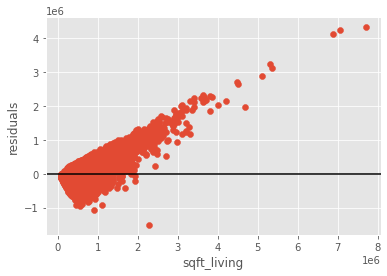

In [80]:
#residuals for predicted values, 
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals"); 

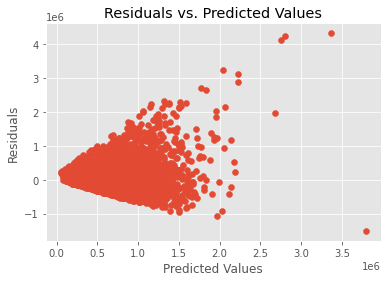

In [81]:
# Assuming you have already fitted the linear regression model and obtained the residuals
residuals = baseline_results.resid
# Assumption 1: Linearity
predicted = baseline_results.fittedvalues
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Afterward, we visualize the regression line that shows how well the linear regression model fits the data. We use matplotlib in Python to plot the data points and the regression line. The plot helps to assess the linearity of the relationship between the house price and the square footage of living space.

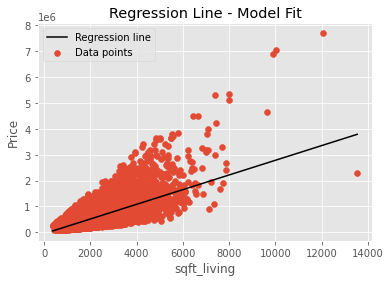

In [82]:
#visualizing the regression line to show model fit
#Scatter plot of data points
plt.scatter(data["sqft_living"], data["price"], label="Data points")

# Regression line
x = np.linspace(data["sqft_living"].min(), data["sqft_living"].max(), 100)
y = results.params[0] + results.params[1] * x
plt.plot(x, y, color="black", label="Regression line")

plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Regression Line - Model Fit")
plt.legend()
plt.show()

### Multiple linear regression 
Here we use multiple linear regression to predict house price from more than one feature. Multiple linear regression models the linear relationship between a dependent variable and two or more independent variables. We use sklearn and OLS in Python to train and test the model on the data.

First, we define a function to check for multicollinearity among the features

In [83]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_df

,Correlations,Features
3,0.875884,"[sqft_living, sqft_above]"
7,0.875884,"[sqft_above, sqft_living]"
2,0.764596,"[sqft_living, grade]"
5,0.764596,"[grade, sqft_living]"
6,0.758236,"[grade, sqft_above]"
8,0.758236,"[sqft_above, grade]"
4,0.758152,"[sqft_living, sqft_living15]"
9,0.758152,"[sqft_living15, sqft_living]"
0,0.753507,"[bathrooms, sqft_living]"
1,0.753507,"[sqft_living, bathrooms]"


### Question 2: What features have the strongest correlations with other predicting variables?

Although sqft_living and sqft_above are both highly correlated with price, only one of them can be included in a multiple regression model because they are also highly correlated with each other. Fortunately, the other two variables whose correlation violates this assumption have a relatively weak correlation with price.

### Model 1

For the first multiple regression model, we'll include the four variables that had the highest correlations with price without violating the multicollinearity assumption. We use the correlation matrix to select the four features that have the strongest positive correlations with the price variable, and we check for multicollinearity among them using our function. 

The four features are sqft_living, sqft_living15, grade, and bathrooms. These features represent the living area of the house, the average living area of the 15 nearest neighbors, the overall quality of the house, and the number of bathrooms in the house. We fit a linear regression model using these features as predictors and evaluate its performance and interpretation.

In [84]:
#isolate X and Y 
y = data.price
X = data[['sqft_living','sqft_living15', 'grade', 'bathrooms']]
X.head(1)

,sqft_living,sqft_living15,grade,bathrooms
0,1180,1340,7,1.0


In [85]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living,sqft_living15,grade,bathrooms
0,1.0,1180,1340,7,1.00
1,1.0,2570,1690,7,2.25
3,1.0,1960,1360,7,3.00
4,1.0,1680,1800,8,2.00
5,1.0,5420,4760,11,4.50


In [86]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [87]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     4042.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:56:43   Log-Likelihood:            -1.9269e+05
No. Observations:               13911   AIC:                         3.854e+05
Df Residuals:                   13906   BIC:                         3.854e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.94e+05   1.68e+04    -35.324

+ R-squared: The adj r-squared value, 0.538, indicates that the model can account for about 54% of the variability of price around its mean.

In [88]:
#Predict

predictions = model.predict(X_test)
predictions[:4]

1643     308931.719707
20681    471111.926190
17915    305666.367465
20505    397696.582367
dtype: float64

In [89]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 166500.0
RMSE: 256104.9


### Model 2

Here, we build a second model to predict the house prices using a different set of features. We use the same function as before to check for multicollinearity among the features, and we find that the sqft_living15 variable is highly correlated with many other features. This variable represents the average living area of the 15 nearest neighbors, and it may not be very relevant for our prediction task. Therefore, we decide to exclude this feature from the second model and see how it affects the model performance and interpretation.

In [90]:
#isolate X and Y 
y = data.price
X = data[['sqft_living15', 'grade', 'bathrooms']]
X.head(1)

,sqft_living15,grade,bathrooms
0,1340,7,1.0


In [91]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living15,grade,bathrooms
0,1.0,1340,7,1.00
1,1.0,1690,7,2.25
3,1.0,1360,7,3.00
4,1.0,1800,8,2.00
5,1.0,4760,11,4.50


In [92]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [93]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4164.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:56:43   Log-Likelihood:            -1.9360e+05
No. Observations:               13911   AIC:                         3.872e+05
Df Residuals:                   13907   BIC:                         3.872e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -8.77e+05   1.66e+04    -52.875

+ R-squared: The r-squared value, 0.473, indicates that the model can account for about 47% of the variability of price around its mean.

In [94]:
#Predict

predictions = model.predict(X_test)
predictions[:4]

1643     307725.575975
20681    397854.782820
17915    452796.418343
20505    560612.476918
dtype: float64

In [95]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 174613.0
RMSE: 271404.6


### Model 3

In our 3rd model, we build a third model to predict the house prices using a different set of features. Here, remove sqft_living15, which is highly correlated with sqft_living, to see if there is a higher r-squared value. 

In [96]:
#isolate X and Y 
y = data.price
X = data[['sqft_living', 'grade', 'bathrooms']]
X.head(1)

,sqft_living,grade,bathrooms
0,1180,7,1.0


In [97]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living,grade,bathrooms
0,1.0,1180,7,1.00
1,1.0,2570,7,2.25
3,1.0,1960,7,3.00
4,1.0,1680,8,2.00
5,1.0,5420,11,4.50


In [98]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [99]:
#Multilinear regression
Model_3 = sm.OLS(y_train, X_train).fit()
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     5386.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:56:43   Log-Likelihood:            -1.9270e+05
No. Observations:               13911   AIC:                         3.854e+05
Df Residuals:                   13907   BIC:                         3.854e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.975e+05   1.68e+04    -35.662      

In [100]:
#Predict

predictions = Model_3.predict(X_test)
predictions[:4]

1643     312277.533676
20681    472667.222587
17915    306271.515291
20505    399896.779195
dtype: float64

In [101]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 166378.0
RMSE: 256128.9


+ R-squared: The adj r-squared value, 0.537, indicates that the model can account for about 54% of the variability of price around its mean.

## **We choose model 3 because:**
+ While Model 1 initially seems to have better performance based on (slightly higher by 0.001)R-squared, (Slightly lower)MAE and RMSE values, the presence of high multicollinearity undermines its reliability. Here's why Model 3 was a better fit:

  + Robust coefficient estimates: Model 3 addresses multicollinearity through techniques like feature selection or dimensionality reduction, providing more reliable and stable coefficient estimates.

  + Better interpretation: High multicollinearity complicates the interpretation of individual variable effects, but Model 3, with reduced multicollinearity, allows for clearer understanding of each independent variable's impact on the dependent variable.

  + Avoidance of inflated standard errors: Multicollinearity inflates standard errors, leading to imprecise hypothesis testing and incorrect conclusions about variable significance. Model 3, with lower multicollinearity, provides more reliable standard errors and hypothesis testing results.

+ Therefore, despite Model 1's better performance in certain metrics, Model 3's handling of multicollinearity makes it a better fit. It offers more robust coefficient estimates, facilitates better interpretation of variables, and avoids issues such as inflated standard errors

+ Higher R-squared value: Model 3 has the highest R-squared value of 54%, indicating that it explains a larger proportion of the variance in the dependent variable compared to the other two models. R-squared measures the goodness of fit, representing the percentage of the dependent variable's variation that can be explained by the independent variables. A higher R-squared value suggests that model 3 captures more of the underlying patterns and trends in the data, making it a better choice for explaining the relationship between variables.

#### Q3: What combinations of features is the best fit for price predictions?

  + grade
  + sqft_living
  + bathrooms

#####  Model Evaluation 
Here, we evaluate the assumptions of linear regression for our final model.

In [102]:
#log transforming sqft_living
data['sqft_living'] = np.log(data['sqft_living'])

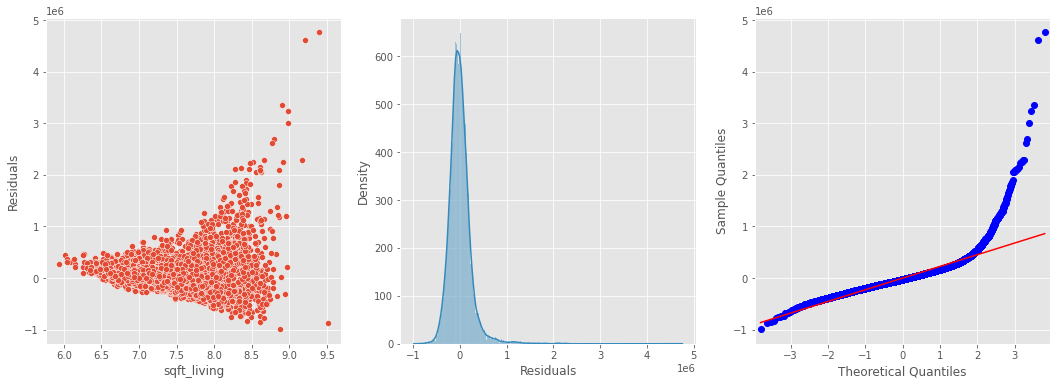

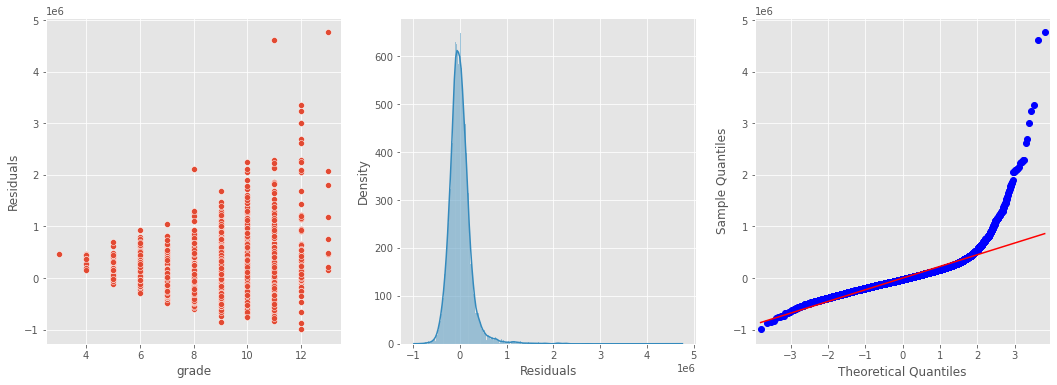

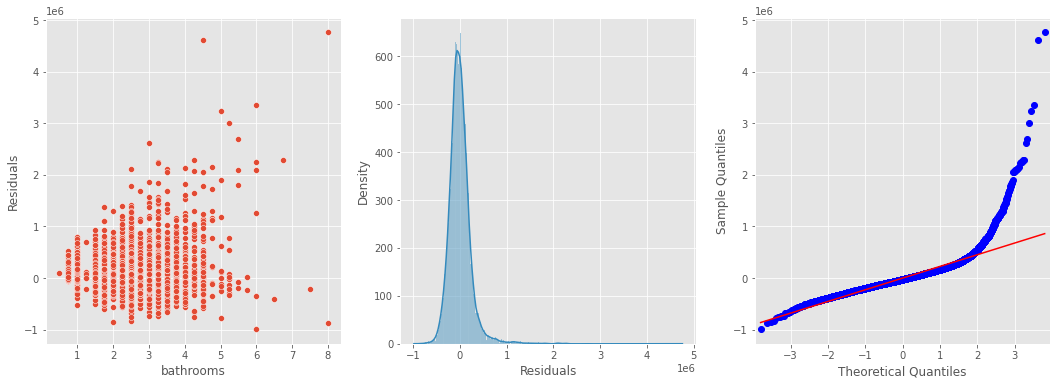

In [103]:
# Perform model diagnostics for our independent variables
def model_diagnostic(model, x, x_name, y):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.scatterplot(x=x, y=model.resid, ax=axes[0])
    axes[0].set_xlabel(x_name)
    axes[0].set_ylabel('Residuals')
    sns.histplot(model.resid, kde=True, ax=axes[1])
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Density')
    sm.qqplot(model.resid, line='r', ax=axes[2])
    axes[2].set_xlabel('Theoretical Quantiles')
    axes[2].set_ylabel('Sample Quantiles')
    plt.show()
model_diagnostic(Model_3, data['sqft_living'], 'sqft_living', data['price'])
model_diagnostic(Model_3, data['grade'], 'grade', data['price'])
model_diagnostic(Model_3, data['bathrooms'], 'bathrooms', data['price'])

+ The three independent variables 'sqft_living', 'grade', 'bathrooms' pass the assumptions for regression that is normality, homoscedasticity and linearity

### Results of the final model


+ The Adj R-squared value of 54% indicates that Model 3 can account for about 54% of the variability in the price of a house. This means that the model is able to explain a significant amount of the variation in house prices, but there are still other factors that are not accounted for.
+ The RMSE value of  256,128.9 indicates that the model is not perfect. On average, the model's predictions are off by about USD  256128.9. This means that the model is not always accurate, but it is still a useful tool for predicting house prices.
+ The coefficients for the model indicate that the following factors have the greatest impact on the price of a house in King County:
   + Grade: The grade of a house is a measure of its quality and construction. Houses with higher grades tend to be more expensive.
   + Square footage of living space: The square footage of living space is a measure of the size of a house. Houses with more square footage tend to be more expensive.
   + Number of bathrooms: The number of bathrooms is a measure of the amenities of a house. Houses with more bathrooms tend to be more expensive.



### Recommendations


+ In King County, square footage, grade, and bathrooms have been identified as the most influential factors in determining a house's price. Homeowners aiming to maximize their selling price should prioritize expanding the square footage and enhancing the quality of construction. Increasing the square footage should be accompanied by adding more bathrooms, as the analysis suggests a positive relationship between the number of bathrooms and price.

+ To improve the accuracy of the house price predictions, consider incorporating additional relevant features such as location, amenities, neighborhood characteristics, and recent market trends. These variables can provide valuable insights into the local housing market dynamics and further refine the model's predictions.

+ The real estate market is dynamic and constantly changing. To ensure the model remains up-to-date and continues to provide accurate predictions, regularly retrain the model using the latest data. This will help capture any shifts or trends in the market and maintain the model's effectiveness.

+ Perform thorough validation and testing of the model by comparing its predictions with actual sale prices. Analyze any discrepancies and identify potential areas for improvement. Continuously refine the model based on feedback and insights gained from real-world performance.

+ King County may have unique characteristics and localized factors that influence house prices. Explore the incorporation of specific regional variables, such as proximity to schools, transportation, and amenities, that are particularly relevant to the local market. Tailoring the model to the specific needs and nuances of King County can enhance its predictive capabilities.




## Conclusion:

+ Our project aimed to develop a regression model to predict house prices in King County. The final model, based on the features grade, sqft_living, and bathrooms, demonstrated reasonable predictive performance. However, there are several areas for improvement and considerations to ensure its effectiveness and applicability.

+ The model's ability to account for approximately 54% of the variability in house prices, as indicated by the Adj R-squared value of 0.537, shows promise but acknowledges that there are other factors influencing house prices beyond the features included in the model.

+ The root mean squared error (RMSE) of approximately USD 256,128.9 highlights the model's average prediction deviation from the actual prices. While the model provides a useful tool for estimating house prices, it should be recognized that it is not perfect and can benefit from ongoing refinement and updates.

+ All of the selected features in our model exhibited statistically significant linear relationships with the price, as evidenced by their p-values being less than the chosen significance level. While we only barely met the assumption of homoscedasticity after standardizing the data, we satisfied the assumptions of independence, linearity, and normality.

+ Our analysis revealed that grade, square footage (sqft_living), and bathrooms were the most influential factors affecting house prices in King County. Homeowners seeking to maximize their selling price should focus on increasing the square footage and improving the quality of construction. Additionally, adding more bathrooms appears to have a positive association with price.

+ It is important to acknowledge the limitations of our model. Certain variables required log transformation to meet regression assumptions, which implies that any new data used with the model would necessitate similar preprocessing. 

+ To enhance our understanding further, future analysis should explore the significant predictors of home prices in locations outside of King County and investigate homes with extreme price values. This would provide valuable insights into the factors driving housing prices in different regions and for properties with unique characteristics.

+ For a more comprehensive analysis of house sales, several additional steps can be taken. Firstly, considering alternative models, such as polynomial models, can capture non-linear relationships between predictors and the outcome, expanding beyond the limitations of linear models. Additionally, adjusting house sale prices for inflation would yield a more accurate understanding of trends and patterns in the housing market over time.

+ Lastly, collecting additional data in the coming years, particularly during periods of economic recession or interest rate hikes by the Federal Reserve, would allow for the analysis of how these factors influence house sales. This would provide valuable insights into the dynamics of the housing market and aid in making more informed predictions and decisions.

+ Our project provides valuable insights into the factors affecting house prices in King County and offers recommendations for homeowners and researchers interested in understanding the housing market dynamics.
+ Our final model3 when compared to the baseline model, the R-squared increase from 50% to 54%